## Tarea Final -  Batalla de vecindarios(barrios) de Montevideo - Parte 1 - HMBP

### Contenido:
- 1.Introducción y descripción del caso
- 2.Análisis demográfico
- 3.Análisis económico
- 4.Análisis geográfico
- 5.Conclusiones preliminares y pasos a seguir.

In [73]:
import pandas as pd
import numpy as np
!conda install -c anaconda xlrd --yes
!pip install openpyxl
!conda install -c anaconda certifi
!pip install --upgrade certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!pip install folium
import folium
from folium.features import DivIcon
import matplotlib as mpl
import matplotlib.pyplot as plt


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



## 1. Introducción y descripción del caso

- El caso a analizar refiere a una empresa multinacional dedicada al rubro gimnasios , centros deportivos y comercialización de articulos deportivos, accesorios y vinculada a una cadena de comida saludable, que desea conocer la mejor ubicación para instalar una nueva sucursal en la ciudad de Montevideo, Uruguay.
- Dicha multinacional ya posee ubicaciones en otras principales ciudades de Lationamérica.
- La ubicación deberá estar en alguna de las zonas o barrios de Montevideo con mayor población y mejor nivel socioeconómico, así como estar cercana a espacios abieros, como zonas costeras, playas y parques.
- Montevideo cuenta con una franja costera conocida como la Rambla, de mas de 15 km de extensión, con playas de arena fina sobre el Rio de la Plata. 
- El objetivo del caso es determinar cuales zonas, municipios o barrios son los más aptos para la instalación de la sucursal, y que estén dentro cercanos a la zona de playas y parques. Montevideo cuenta con 62 barrios agrupados en 8 municipios.
- Fuente :https://es.wikipedia.org/wiki/Anexo:Barrios_de_Montevideo, https://es.wikipedia.org/wiki/Anexo:Municipios_de_Montevideo

## 2. Análisis demográfico

* Descargamos los datos de población por barrios de Montevieo, de acuerdo al útlimo censo oficial del INE( Instituto Nacional de Estadísticas) del Uruguay.

In [77]:
# Descargamos el archivo de la poblacion de Montevideo por barrios desde la página del INE segun censo 2011.
# Mostramos las 10 primeras y 10 últimas filas para depurar inconsistencias
df_montevideo = pd.read_excel('https://www.ine.gub.uy/c/document_library/get_file?uuid=4718ab8a-c64e-439c-ba8e-7d56371b6c89&groupId=10181')
print(df_montevideo.head(10))
print(df_montevideo.tail(10))

  Población por sexo, según barrio. Montevideo Unnamed: 1 Unnamed: 2  \
0                                          NaN        NaN        NaN   
1                                          NaN     Código        NaN   
2                                       Barrio  de barrio      Total   
3                                          NaN        NaN        NaN   
4                                          NaN        NaN        NaN   
5                                        Total        NaN    1318755   
6                                          NaN        NaN        NaN   
7                                 Ciudad Vieja          1      12555   
8                                       Centro          2      22120   
9                                   Barrio Sur          3      12639   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1       Sexo        NaN  
2     Hombre      Mujer  
3        NaN        NaN  
4        NaN        NaN  
5     613756     704999  
6        NaN        NaN  

In [78]:
# Depuramos filas y columnas con datos inconsistentes y renombramos columnas.
df_montevideo = df_montevideo.drop([0,1,2,3,4,5,6, 69,70,71,72,73], axis = 0).drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df_montevideo.rename(columns= {'Población por sexo, según barrio. Montevideo': 'Barrio', 'Unnamed: 2':'Poblacion'}, inplace = True)
# Ordenamos de forma descendente por poblacion y  mostramos el Dataframe final.
df_montevideo.sort_values('Poblacion', ascending = False, inplace = True)
df_montevideo

,Barrio,Poblacion
14,Pocitos,67992
10,Cordón,42456
29,Unión,39880
43,"La Paloma, Tomkinson",37424
15,Buceo,36998
...,...,...
51,La Figurita,11273
53,La Blanqueada,9600
50,Jacinto Vera,8767
22,Bañados de Carrasco,8705


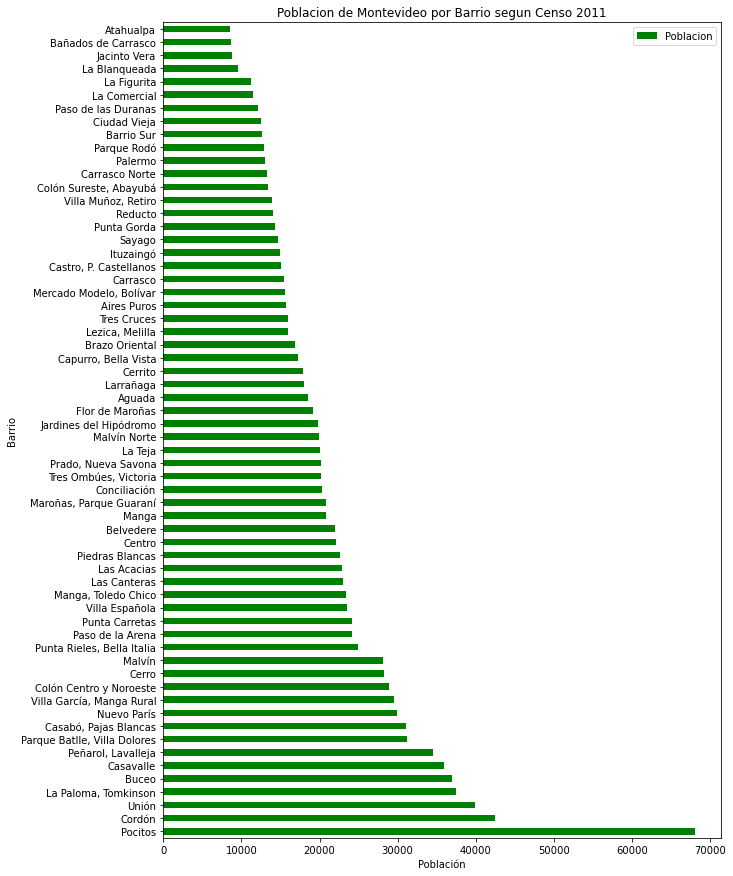

In [79]:
# Visualizamos los barrios por medio de un gráfico de barras horizontales
df_montevideo.set_index('Barrio').plot(kind='barh', figsize=(10,15) , color = 'green')
plt.xlabel('Población')
plt.ylabel('Barrio')
plt.title('Poblacion de Montevideo por Barrio segun Censo 2011')
plt.show()

In [80]:
# Descargamos Los datos de barrios por municipio.
#(fuente : https://gsutter.medium.com/c%C3%B3mo-leer-tablas-html-con-pandas-ef1c59ffa81a)
df_montevideo_municipios = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Barrios_de_Montevideo')
# Determinamos cuantas tablas hay (fuente: https://gsutter.medium.com/c%C3%B3mo-leer-tablas-html-con-pandas-ef1c59ffa81a)
print(f'Número total de tablas: {len(df_montevideo_municipios)}')
for i in range(len(df_montevideo_municipios)):
  print(df_montevideo_municipios[i].head())
# Elegimos la tabla que tiene los datos de municipios
df_montevideo_municipios = df_montevideo_municipios[6]
df_montevideo_municipios

Número total de tablas: 7
                                       Ciudad/Pueblo Población[2]​
0                                         Montevideo     1.269.552
1                                      Pajas Blancas         1.976
2                                   Santiago Vázquez         1.482
3                                            Abayubá           924
4  Montevideo rural(Melilla, Bañados de Carrasco,...        52.034
    0                                                  1
0 NaN  Este artículo o sección tiene referencias, per...
    0                                                  1
0 NaN  Este artículo o sección necesita referencias q...
           Barrio  Imagen                           Límite con otros barrios  \
0    Ciudad Vieja     NaN                     Centro y Barrio Sur (al este).   
1      Barrio Sur     NaN  Ciudad Vieja (al oeste), Centro (al norte) y P...   
2         Palermo     NaN  Cordón y Centro (al norte), Parque Rodó (al es...   
3  Punta Carretas     Na

,Ref,«Los 62 Barrios»,CCZ,* Municipios
0,1,Ciudad Vieja,1,B
1,2,Centro,1,B
2,3,Barrio Sur,1,B
3,4,Cordón,2,B
4,5,Palermo,2,B
...,...,...,...,...
57,58,"Colón Sureste, Abayubá",12,G
58,59,Colón Centro y Noroeste,12,G
59,60,"Lezica, Melilla",12,A y G
60,61,"Villa García, Manga Rural",9,F


In [81]:
# Depuramos y renombramos columnas
df_montevideo_municipios.drop(['Ref', 'CCZ'], axis = 1, inplace = True)
df_montevideo_municipios.rename(columns ={'«Los 62 Barrios»': 'Barrio', '* Municipios': 'Municipio'}, inplace = True)
df_montevideo_municipios

,Barrio,Municipio
0,Ciudad Vieja,B
1,Centro,B
2,Barrio Sur,B
3,Cordón,B
4,Palermo,B
...,...,...
57,"Colón Sureste, Abayubá",G
58,Colón Centro y Noroeste,G
59,"Lezica, Melilla",A y G
60,"Villa García, Manga Rural",F


In [82]:
# Agregamos los datos de poblacion
df_montevideo_all = df_montevideo.merge(df_montevideo_municipios, how = 'left')
df_montevideo_all


,Barrio,Poblacion,Municipio
0,Pocitos,67992,CH
1,Cordón,42456,B
2,Unión,39880,"D, E y F"
3,"La Paloma, Tomkinson",37424,A
4,Buceo,36998,CH y E
...,...,...,...
57,La Figurita,11273,C
58,La Blanqueada,9600,CH y E
59,Jacinto Vera,8767,C
60,Bañados de Carrasco,8705,F


In [83]:
# Verificamos la integridad de los datos de ambos Dataframes
print('Suma de poblacion por municipios',df_montevideo_all['Poblacion'].sum())
print('Suma de poblacion por barrios',df_montevideo['Poblacion'].sum())

if print(df_montevideo_all['Poblacion'].sum())==print(df_montevideo['Poblacion'].sum()):
    print(' La suma de ambos DataFramies es igual')
else:
    print(' La suma de ambos DataFramies no cuadra')

Suma de poblacion por municipios 1318755
Suma de poblacion por barrios 1318755
1318755
1318755
 La suma de ambos DataFramies es igual


In [84]:
# Agrupmaos la poblacion por municipio
df_montevideo_all_municipio = df_montevideo_all.groupby('Municipio', as_index= False, sort = True).sum()
df_montevideo_all_municipio.sort_values('Poblacion', ascending=False, inplace = True)
df_montevideo_all_municipio

,Municipio,Barrio,Poblacion
16,F,"Villa García, Manga RuralMangaMaroñas, Parque ...",133776
17,G,"Peñarol, LavallejaColón Centro y NoroesteConci...",123867
3,B,CordónCentroPalermoParque RodóBarrio SurCiudad...,115706
9,CH,"PocitosParque Batlle, Villa Dolores",99145
14,E,MalvínMalvín NorteCarrascoPunta GordaCarrasco ...,91104
0,A,"La Paloma, TomkinsonCasabó, Pajas BlancasLa Teja",88581
6,C,Brazo OrientalReductoLa FiguritaJacinto VeraAt...,59555
11,D,"CasavalleManga, Toledo Chico",59390
10,CH y E,BuceoLa Blanqueada,46598
12,D y F,Villa EspañolaPiedras Blancas,46041


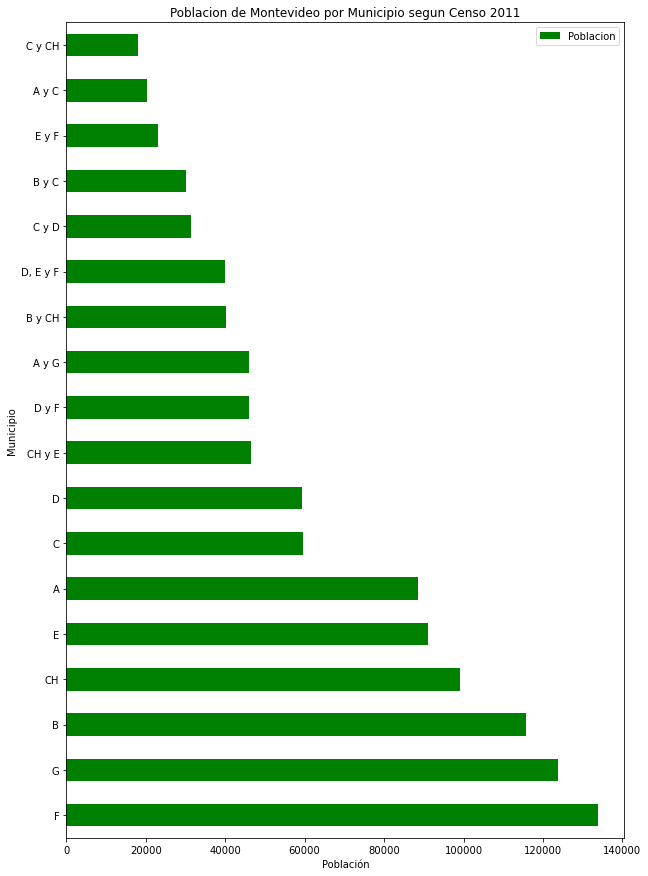

In [85]:
# Visualizamos los municipios por medio de un gráfico de barras horizontales
df_montevideo_all_municipio.set_index('Municipio').plot(kind='barh', figsize=(10,15) , color = 'green')
plt.xlabel('Población')
plt.ylabel('Municipio')
plt.title('Poblacion de Montevideo por Municipio segun Censo 2011')
plt.show()

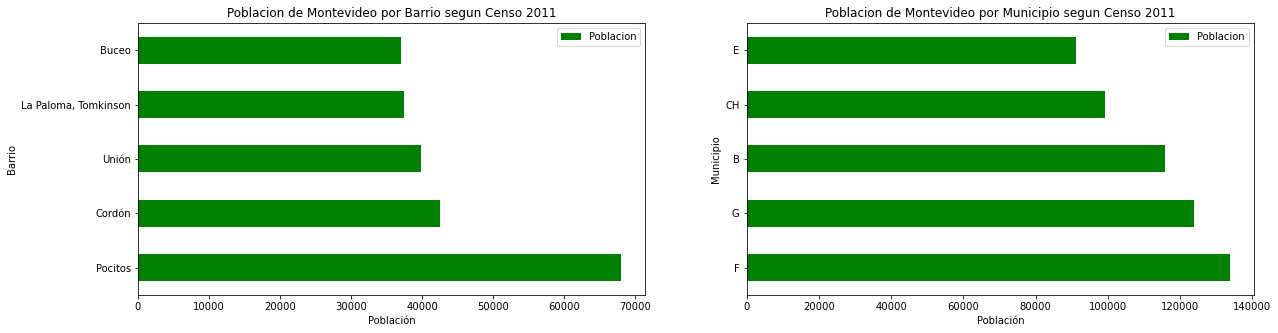

In [86]:
# Graficamos los top 5 para barrios y municipios
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
#Top 5 barrios
df_montevideo.set_index('Barrio').head(5).plot(kind='barh', figsize=(20,5) , color = 'green', ax=ax0)
ax0.set_xlabel('Población')
ax0.set_ylabel('Barrio')
ax0.set_title('Poblacion de Montevideo por Barrio segun Censo 2011')

#Top 5 municipios
df_montevideo_all_municipio.set_index('Municipio').head(5).plot(kind='barh', figsize=(20,5) , color = 'green', ax = ax1)
ax1.set_xlabel('Población')
ax1.set_ylabel('Municipio')
ax1.set_title('Poblacion de Montevideo por Municipio segun Censo 2011')

plt.show()


### 3. Análisis económico

In [2]:
!pip install wget
import wget

#https://www.ine.gub.uy/c/document_library/get_file?uuid=75b6cb00-387e-40ee-a694-eb64314e81db&groupId=10181

In [5]:
!wget -O 'ECH_2017.rar' https://www.ine.gub.uy/c/document_library/get_file?uuid=75b6cb00-387e-40ee-a694-eb64314e81db&groupId=10181

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"groupId" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [87]:
import pandas as pd
# Dado que no es posible descargar el archivo rar directamente de la pàgina, se descarga a disco y  extrae como .csv
df_montevideo_encuesta = pd.read_csv(r'C:\Users\HUGO\Documents\Downloads\H_2017_Terceros.csv')
df_montevideo_encuesta.head()

,"NUMERO,C,10","ANIO,C,4","MES,N,3,0","DPTO,N,3,0","NOMDPTO,C,15","SECC,C,2","SEGM,C,3","LOC_AGR_13,C,5","NOMLOC13,C,120","CCZ,N,2,0",...,"HT11,N,12,2","HT13,N,8,0","HT14,N,20,2","HT19,N,4,0","YHOG,N,9,0","YSVL,N,9,0","LP_06,N,8,0","LI_06,N,8,2","POBRE06,N,8,2","INDIG06,N,8,2"
0,2017000001,2017,1,1,MONTEVIDEO,17.0,6.0,1010,Montevideo,11,...,46658,6000,0,2,1779,40658,21015,2979,0,0
1,2017000002,2017,6,3,CANELONES,NaN,NaN,3023,"Canelones y otras (Paso Espinosa, Paso Palomeque)",0,...,65622,13000,0,2,1836,52622,14762,2802,0,0
2,2017000003,2017,2,1,MONTEVIDEO,24.0,108.0,1010,Montevideo,5,...,160632,30000,0,3,1816,130632,30817,2981,0,0
3,2017000004,2017,3,1,MONTEVIDEO,17.0,5.0,1010,Montevideo,11,...,54159,8000,0,5,14749,46159,48094,2987,0,0
4,2017000006,2017,5,3,CANELONES,NaN,NaN,30020,�rea metropolitana de Montevideo,0,...,83758,0,5000,2,1836,83758,14754,2804,0,0


In [88]:
import numpy as np
# Determinamos que columnas componen el dataframe
np.array(df_montevideo_encuesta.columns)

array(['NUMERO,C,10', 'ANIO,C,4', 'MES,N,3,0', 'DPTO,N,3,0',
       'NOMDPTO,C,15', 'SECC,C,2', 'SEGM,C,3', 'LOC_AGR_13,C,5',
       'NOMLOC13,C,120', 'CCZ,N,2,0', 'BARRIO,N,2,0', 'NOMBARRIO,C,25',
       'ESTRED13,N,4,0', 'REGION_3,N,8,2', 'REGION_4,N,8,0',
       'PESOANO,N,19,0', 'PESOSEM,N,10,0', 'PESOTRI,N,10,0',
       'PESOMEN,N,10,0', 'C1,N,4,0', 'C2,N,4,0', 'C3,N,4,0', 'C4,N,4,0',
       'C5_1,N,4,0', 'C5_2,N,4,0', 'C5_3,N,4,0', 'C5_4,N,4,0',
       'C5_5,N,4,0', 'C5_6,N,4,0', 'C5_7,N,4,0', 'C5_8,N,4,0',
       'C5_9,N,4,0', 'C5_10,N,4,0', 'C5_11,N,4,0', 'C5_12,N,4,0',
       'C6,N,4,0', 'D8_1,N,4,0', 'D8_2,N,11,0', 'D8_3,N,11,0',
       'D8_4,N,4,0', 'D9,N,4,0', 'D10,N,4,0', 'D11,N,4,0', 'D12,N,4,0',
       'D13,N,4,0', 'D14,N,4,0', 'D15,N,4,0', 'D16,N,4,0', 'D18,N,4,0',
       'D260,N,4,0', 'D19,N,4,0', 'D20,N,4,0', 'D21_1,N,4,0',
       'D21_2,N,4,0', 'D21_3,N,4,0', 'D21_4,N,4,0', 'D21_4_1,N,5,0',
       'D21_5,N,4,0', 'D21_5_1,N,5,0', 'D21_6,N,4,0', 'D21_20,N,4,0',
       

In [89]:
# Seleccionamos y renombramos columnas 
df_montevideo_socioeconom = df_montevideo_encuesta[['NOMDPTO,C,15','NOMLOC13,C,120','NOMBARRIO,C,25','ESTRED13,N,4,0','YHOG,N,9,0']]
df_montevideo_socioeconom.rename(columns = {'NOMDPTO,C,15':'Departamento','NOMLOC13,C,120':'Localidad','NOMBARRIO,C,25':'Barrio','ESTRED13,N,4,0':'Nivel-SocioEconómico','YHOG,N,9,0':'IngresoxHogar'}, inplace=True)
# Seleccionamos solo las correspondientes a MONTEVIDEO
df_montevideo_socioeconom = df_montevideo_socioeconom[df_montevideo_socioeconom['Departamento'] == 'MONTEVIDEO']
# Depuramos columnas ydejamos solo los nommbres de los barrios y los datos económicos
df_montevideo_socioeconom.drop(['Departamento','Localidad'], axis = 1, inplace = True)
df_montevideo_socioeconom.reset_index(drop=True)
df_montevideo_socioeconom

C:\Users\HUGO\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Barrio,Nivel-SocioEconómico,IngresoxHogar
0,Casavalle,1,1779
2,Pocitos,5,1816
3,Manga,1,14749
6,Cerrito,3,1816
8,Manga,2,4320
...,...,...,...
45348,Parque Rodo,4,0
45349,"Pta. Rieles, Bella Italia",2,0
45350,Malvin,5,7000
45351,Barrio Sur,4,1958


In [90]:
df_montevideo_socioeconom.reset_index(drop=True)

,Barrio,Nivel-SocioEconómico,IngresoxHogar
0,Casavalle,1,1779
1,Pocitos,5,1816
2,Manga,1,14749
3,Cerrito,3,1816
4,Manga,2,4320
...,...,...,...
17810,Parque Rodo,4,0
17811,"Pta. Rieles, Bella Italia",2,0
17812,Malvin,5,7000
17813,Barrio Sur,4,1958


In [91]:
# Agrupamos por barrio y calculamos la media de Nivel socioeconómico e Ingresos por hogar, ordenado de mayor a menor.
df_montevideo_socioeconom_barrio = df_montevideo_socioeconom.groupby('Barrio', as_index = False, sort = True).mean()
df_montevideo_socioeconom_barrio.sort_values('Nivel-SocioEconómico', ascending=False, inplace = True)
df_montevideo_socioeconom_barrio.set_index('Barrio', inplace = True)
df_montevideo_socioeconom_barrio

,Nivel-SocioEconómico,IngresoxHogar
Barrio,,
Carrasco,5.000000,41708.598394
Punta Carretas,5.000000,16753.442982
Punta Gorda,4.897260,15921.404110
Pocitos,4.729483,14636.900456
Carrasco Norte,4.561404,14906.409357
...,...,...
"Villa Garcia, Manga Rur.",1.337037,4543.707407
"Casabo, Pajas Blancas",1.318182,4718.542208
"Pta. Rieles, Bella Italia",1.300885,5194.234513


###### Datos del clasificador de Nivel Socieconómico del  INE

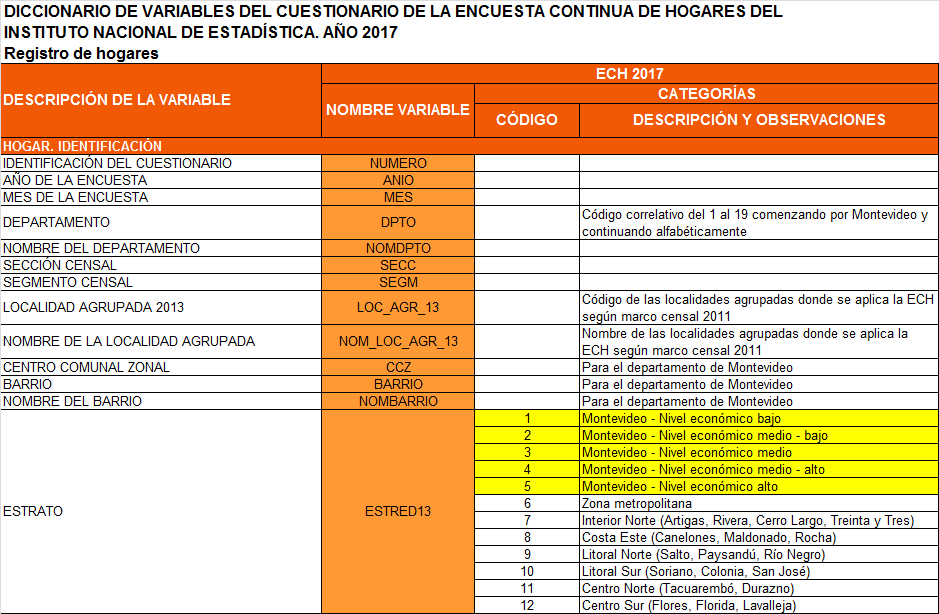


In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt


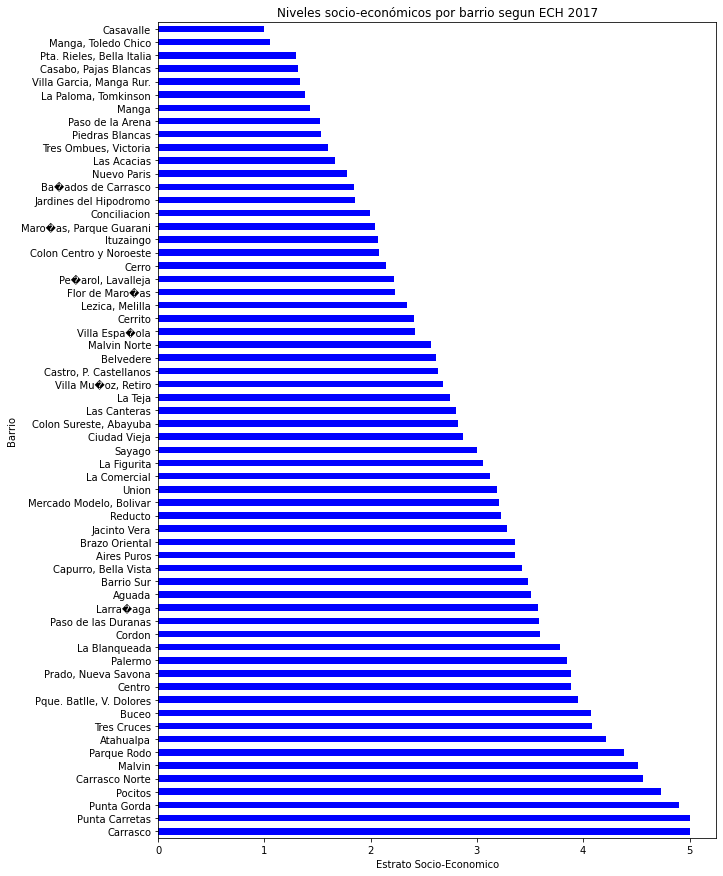

In [93]:
# Visualizamos los barrios por medio de un gráfico de barras horizontales
df_montevideo_socioeconom_barrio['Nivel-SocioEconómico'].plot(kind='barh', figsize=(10,15) , color = 'blue')
plt.xlabel('Estrato Socio-Economico')
plt.ylabel('Barrio')
plt.title('Niveles socio-económicos por barrio segun ECH 2017')
plt.show()

In [147]:
#Agrupamos por barrio  y agregamos el Municipio
df_montevideo_socioeconom_municipio = df_montevideo_socioeconom_barrio.join(df_montevideo_municipios, how = 'left', lsuffix ='_call', rsuffix = '_municipio')
df_montevideo_socioeconom_municipio

,Nivel-SocioEconómico,IngresoxHogar,Municipio
Barrio,,,
Carrasco,5.000000,41708.598394,E
Punta Carretas,5.000000,16753.442982,B y CH
Punta Gorda,4.897260,15921.404110,E
Pocitos,4.729483,14636.900456,CH
Carrasco Norte,4.561404,14906.409357,E
...,...,...,...
"Villa Garcia, Manga Rur.",1.337037,4543.707407,NaN
"Casabo, Pajas Blancas",1.318182,4718.542208,NaN
"Pta. Rieles, Bella Italia",1.300885,5194.234513,NaN


In [149]:
#Agrupamos por municipio y calculamos la media de Nivel socioeconómico e Ingresos por hogar, ordenado de mayor a menor
df_montevideo_socioeconom_municipio = df_montevideo_socioeconom_municipio.groupby('Municipio', as_index = False, sort = True).mean()
df_montevideo_socioeconom_municipio.sort_values('Nivel-SocioEconómico', ascending=False, inplace = True)
df_montevideo_socioeconom_municipio.set_index('Municipio', inplace = True)
df_montevideo_socioeconom_municipio

,Nivel-SocioEconómico,IngresoxHogar
Municipio,,
E,4.819555,24178.803953
CH,4.729483,14636.900456
B y CH,4.543561,12299.547249
CH y E,3.926684,7442.671847
A y C,3.883621,6193.896552
B,3.521299,5832.318959
C,3.426126,5680.093443
C y D,3.357143,7104.066964
B y C,3.314775,5328.958118


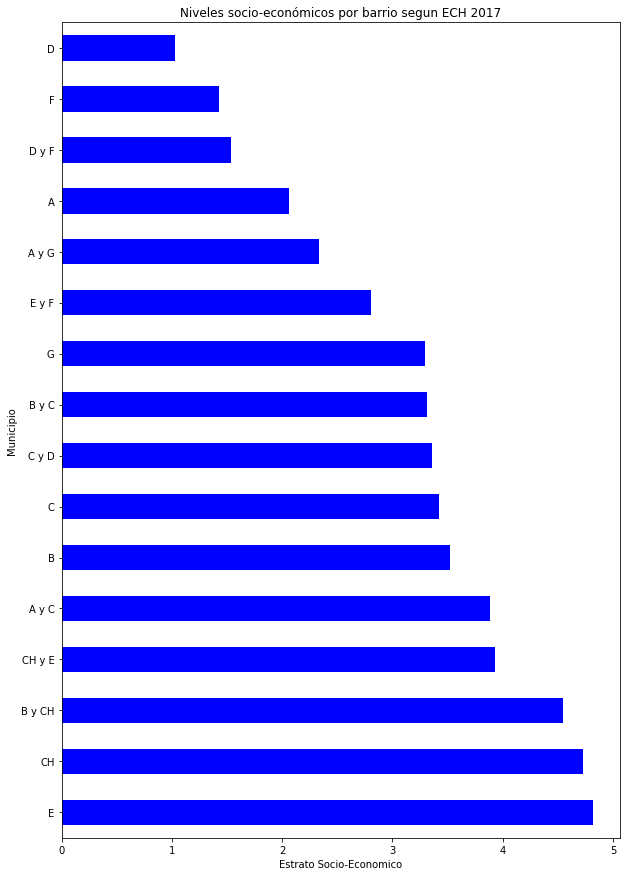

In [150]:
# Visualizamos los municipios por medio de un gráfico de barras horizontales
df_montevideo_socioeconom_municipio['Nivel-SocioEconómico'].plot(kind='barh', figsize=(10,15) , color = 'blue')
plt.xlabel('Estrato Socio-Economico')
plt.ylabel('Municipio')
plt.title('Niveles socio-económicos por barrio segun ECH 2017')
plt.show()

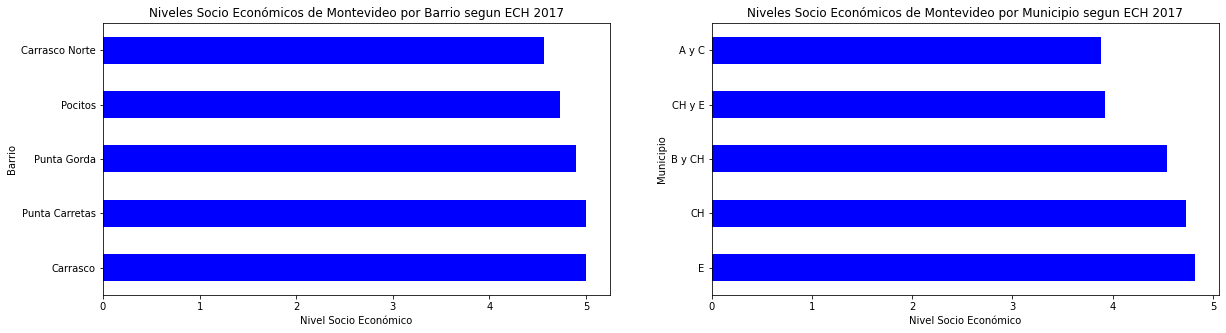

In [152]:
# Graficamos los top 5 para barrios y municipios
fig2 = plt.figure()
ax0 = fig2.add_subplot(1,2,1)
ax1 = fig2.add_subplot(1,2,2)
#Top 5 barrios
df_montevideo_socioeconom_barrio['Nivel-SocioEconómico'].head(5).plot(kind='barh', figsize=(20,5) , color = 'blue', ax=ax0)
ax0.set_xlabel('Nivel Socio Económico')
ax0.set_ylabel('Barrio')
ax0.set_title('Niveles Socio Económicos de Montevideo por Barrio segun ECH 2017')

#Top 5 municipios
df_montevideo_socioeconom_municipio['Nivel-SocioEconómico'].head(5).plot(kind='barh', figsize=(20,5) , color = 'blue', ax = ax1)
ax1.set_xlabel('Nivel Socio Económico')
ax1.set_ylabel('Municipio')
ax1.set_title('Niveles Socio Económicos de Montevideo por Municipio segun ECH 2017')

plt.show()


### 4. Análisis geográfico

En esta parte intentaremos asociar las coordenadas a los 62 barrios de montevideo, para visualizar su cercanía a la costa o parques.

In [153]:
# Buscamos las coordenadas para realizar el mapa
address = 'Ciudad Vieja, Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Las coordenadas de '+address,' son {}, {}.'.format(latitude,longitude))

Las coordenadas de Ciudad Vieja, Montevideo, Uruguay  son -34.9063505, -56.2059795.


In [154]:
# Buscamos las coordenadas para realizar el mapa
address = 'Carrasco, Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Las coordenadas de '+address,' son {}, {}.'.format(latitude,longitude))

Las coordenadas de Carrasco, Montevideo, Uruguay  son -34.8855774, -56.0581498.


Vemos que difieren para dos barrios distintos, por lo que es factible realizar el mapa.


In [156]:
# Buscamos las coordenadas para realizar el mapa
address = 'Montevideo, Uruguay'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
montevideo_coord = pd.Series({'Latitud': latitude, 'Longitud': longitude})
print('Latitud Montevideo-Ciudad:',montevideo_coord[0])
print('Longitud Montevideo-Ciudad:',montevideo_coord[1])

Latitud Montevideo-Ciudad: -34.9058916
Longitud Montevideo-Ciudad: -56.1913095


In [177]:
# Definimos una funcion para determinar las coordenadas para cada municipio de Toronto
# fuente : https://es.stackoverflow.com/questions/330223/usar-geopy-en-un-dataframe-para-hallar-latitud-y-longitud
def get_coords(barrio):
    geolocator = Nominatim(user_agent="to_explorer")
    address = f'{barrio}, Montevideo, Uruguay'
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = longitude = 'No Existe'
    
    return pd.Series({"Latitud": latitude, "Longitude": longitude})


df_montevideo_coord = pd.concat([df_montevideo_all, df_montevideo_all['Barrio'].apply(get_coords)], axis=1)
df_montevideo_coord

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Pocitos,67992,CH,-34.911123,-56.150593
1,Cordón,42456,B,-34.900827,-56.180125
2,Unión,39880,"D, E y F",-34.880236,-56.137688
3,"La Paloma, Tomkinson",37424,A,-34.858785,-56.25942
4,Buceo,36998,CH y E,-34.8978,-56.128658
...,...,...,...,...,...
57,La Figurita,11273,C,-34.876757,-56.17672
58,La Blanqueada,9600,CH y E,-34.8877,-56.154518
59,Jacinto Vera,8767,C,-34.874534,-56.171774
60,Bañados de Carrasco,8705,F,-34.840727,-56.079019


In [181]:
for b in df_montevideo_all['Barrio']:
    address = f'{b}, Montevideo, Uruguay'
    location = geolocator.geocode(address)
    if location is None:
        print(b)
    else:
        pass

Casabó, Pajas Blancas
Villa García, Manga Rural
Colón Centro y Noroeste
Punta Rieles, Bella Italia
Manga, Toledo Chico
Maroñas, Parque Guaraní
Tres Ombúes, Victoria
Prado, Nueva Savona
Lezica, Melilla
Castro, P. Castellanos
Colón Sureste, Abayubá


In [180]:
# Eliminamos valores vacios para las coordenadas
df_montevideo_coord2 = df_montevideo_coord[df_montevideo_coord['Latitud'] != 'No Existe' ]
df_montevideo_coord2.reset_index(drop= True)

,Barrio,Poblacion,Municipio,Latitud,Longitude
0,Pocitos,67992,CH,-34.911123,-56.150593
1,Cordón,42456,B,-34.900827,-56.180125
2,Unión,39880,"D, E y F",-34.880236,-56.137688
3,"La Paloma, Tomkinson",37424,A,-34.858785,-56.25942
4,Buceo,36998,CH y E,-34.8978,-56.128658
5,Casavalle,35979,D,-34.828916,-56.168784
6,"Peñarol, Lavalleja",34485,G,-34.841683,-56.186343
7,"Parque Batlle, Villa Dolores",31153,CH,-34.896868,-56.153383
8,Nuevo París,29873,A y G,-34.839535,-56.243839
9,Cerro,28306,NaN,-34.889817,-56.252625


In [159]:
# Graficamos el mapa de Montevideo, Uruguay
map_montevideo = folium.Map(location=[montevideo_coord[0],montevideo_coord[1]], zoom_start = 12, tiles = 'Stamen Toner')
map_montevideo

In [182]:
# Añadimos marcadores de los municipios y vecindarios
for lat,lng, municipio, barrio, poblacion in zip(df_montevideo_coord2['Latitud'],df_montevideo_coord2['Longitude'],
                                      df_montevideo_coord2['Municipio'],df_montevideo_coord2['Barrio'],df_montevideo_coord2['Poblacion']):
    label= 'Poblacion {}'.format(poblacion)
    label= folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=7,
        popup= label,
        color= 'red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montevideo)
    folium.map.Marker(
        [lat,lng],
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 6; color:#d35400;"><b>%s</b></div>' % '{} Municipio{}'.format(barrio,municipio))).add_to(map_montevideo)

map_montevideo


### 5. Conclusiones y pasos a seguir

Top 5 Barrios y Municipios por poblacion
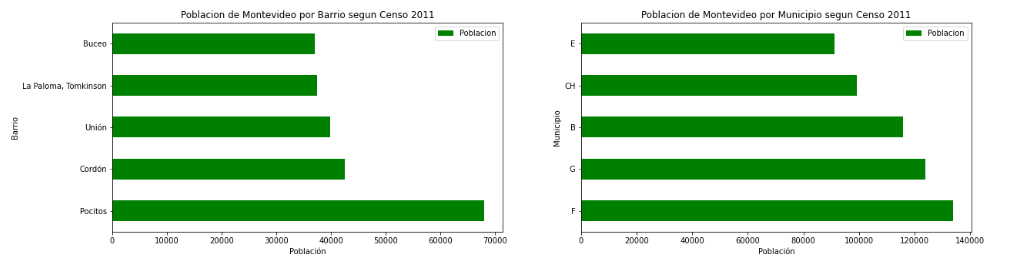
Top 5 Barrios y Municipios por nivel socio económico
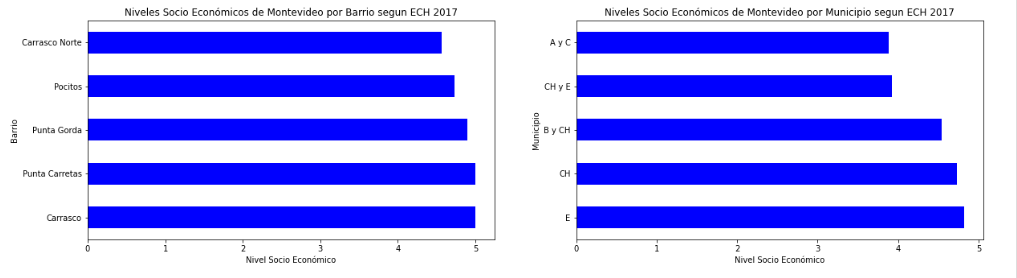
Barrios y Municipios cercanos a la costa
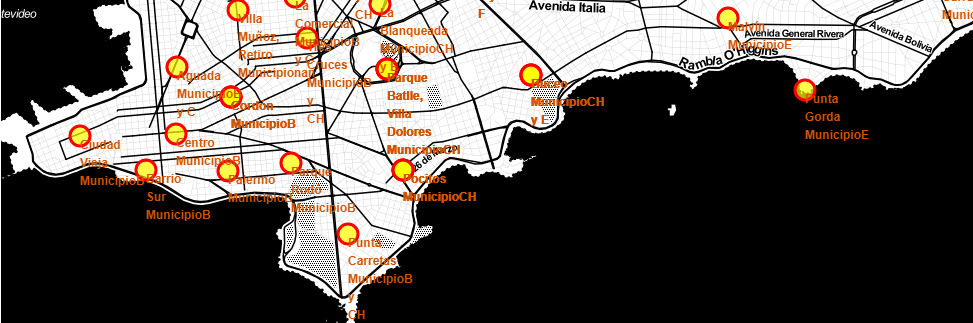

##### Conclusion :
Nuestra busqueda se orientará en los municipios B, CH y E, dado que poseen mayor nivel socioeconómico, mayor poblacion y mayor cercania a la costa. A y C quedan descartados , al igual que G, dado que estan lejanos a la zona costera de playas.
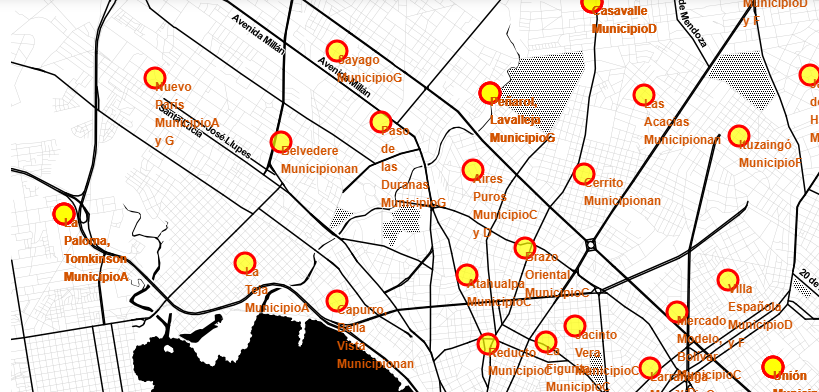

##### Proximos pasos :
En la 2da parte con la API de Foursquare buscaremos que sitios de interes comercial y deportivo poseen estos municipios, yen función de eso realizaremos un clustering por ranking de sitios.

#### CONTINUA EN BATALLA DE VECINDARIOS DE MONTEVIDEO - PARTE 2